# **A Little about Python and Jupyter**


**Required Reading/Viewing:**

1. Placeholder 

**Additional Reading**
1. Forsyth, David A., and Jean Ponce. Computer vision: a modern approach. Prentice Hall Professional Technical Reference, 2002. Section 4.1

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

In [1]:
#(Optional) Download data + videos if you don't have them.
import os
from util.get_and_unpack import get_and_unpack

if not os.path.isdir('data/'):
    url = 'http://www.welchlabs.io/unccv/the_original_problem/data/data.zip'
    get_and_unpack(url)
    
if not os.path.isdir('videos/'):
    url = 'http://www.welchlabs.io/unccv/the_original_problem/videos.zip'
    get_and_unpack(url)   

![](graphics/spacer_small.png)

## **1. Noisy**

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Load image
im = imread('data/medium_2/ball/ball_3.jpg')

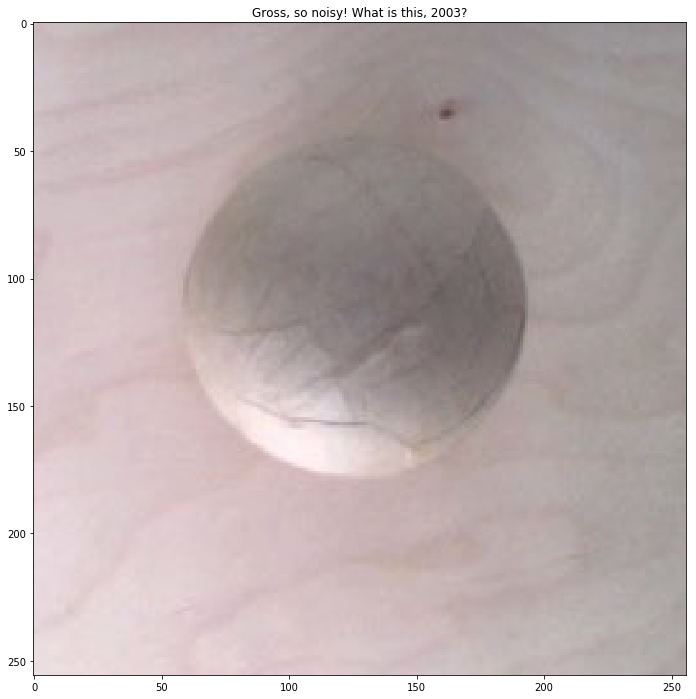

In [4]:
#Let's have a look
fig = figure(0, (12,12))
imshow(im)
title('Gross, so noisy! What is this, 2003?');

- This is a particularly noisy image from our dataset - it was captured under relatively low light conditions with the webcam of my 2008 macbook.
- The z-axis height of the surface below corresponds to the grayscale intesnity of our image.

![](videos/noisy_image_rotating_3.gif)

- Let's have a look at the result of our implementation of Robert's Cross from last time on this image. 
- This is brings us to some important points about how we'll be using python in the couse.

## A little bit about python + the jupyter notebook

- There's a couple of methods from our last notebook that we would like to use here. 
- We could copy + paste these methods into this notebook, but a better appraoch is to create a python module in a seperate .py file that holds commonly used code. 
- You may have noticed the "util" directory in this repo:

In [5]:
ls

README.md                       data/
[1] The Original Problem.ipynb  graphics/
[2] Edges.ipynb                 papers/
[3] Better Edges.ipynb          requirements.txt
__MACOSX/                       util/
challenge/                      videos/


It contains a serveral python modules that contain the various methods we'll develop in the module:

In [6]:
ls util/*

util/filters.py         util/get_and_unpack.py  util/image.py

util/__pycache__:
filters.cpython-36.pyc         image.cpython-36.pyc
get_and_unpack.cpython-36.pyc


- Let's go have a look at one of these .py files in a text editor. 
- We can import specific methods from these .py files like this: 

In [7]:
from util.image import convert_to_grayscale

While we're at it, let's look a few nice notebook features. We can see the docstring of the methods we're using right in the notebook by adding a question mark to the end of method or class names:

In [8]:
convert_to_grayscale?

Another nice feature: Press **Shift+Tab** with your cursor inside a methods parenthesis to see it's arguments. 

![](graphics/spacer_small.png)

![](videos/shift_tab.gif)

![](graphics/spacer_small.png)

And finally, you can access search all commands using the command pallate:
- **(cmnd + shift + p)** on mac
- **(ctrl + shift + p)** on linux/windows

And to view all keyboard shortucts press **esc** then **h.**

![](videos/jupyter_shortcuts.gif)

### **One more thing about importing python modules**

- Modules are compiled on import. 
- If we poke around our util director after import, we see that each python file is compiled into it's own .pyc in a python automatically generated directory called \__pycache__

In [9]:
ls util*

__pycache__/       filters.py         get_and_unpack.py  image.py


In [10]:
ls util/__pycache__/

filters.cpython-36.pyc         image.cpython-36.pyc
get_and_unpack.cpython-36.pyc


- The important thing to note here is that if you make a change to a .py file, the results of this change will not actually show up **until you reimport the module**, recompiling the .py into .pyc.
- Generally, I'll just run "Restart and Run All" from the Kernel dropdown menu when I make a module change. 
- **Quick Demo:**

In [11]:
gray = convert_to_grayscale(im/255.)

![](graphics/spacer_small.png)

![](graphics/spacer_small.png)

### **Ok, enough fun with jupyter - let's process our noisy image.**

In [12]:
gray = convert_to_grayscale(im)

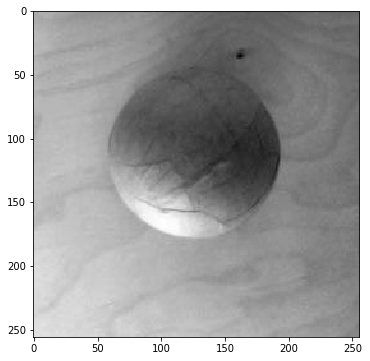

In [13]:
fig = figure(0, (6,6))
imshow(gray, cmap = 'gray');

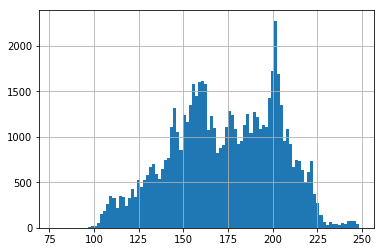

In [14]:
hist(gray.ravel(), 100);
grid(1)

In [15]:
from util.filters import roberts_cross

In [16]:
edges = roberts_cross(gray)

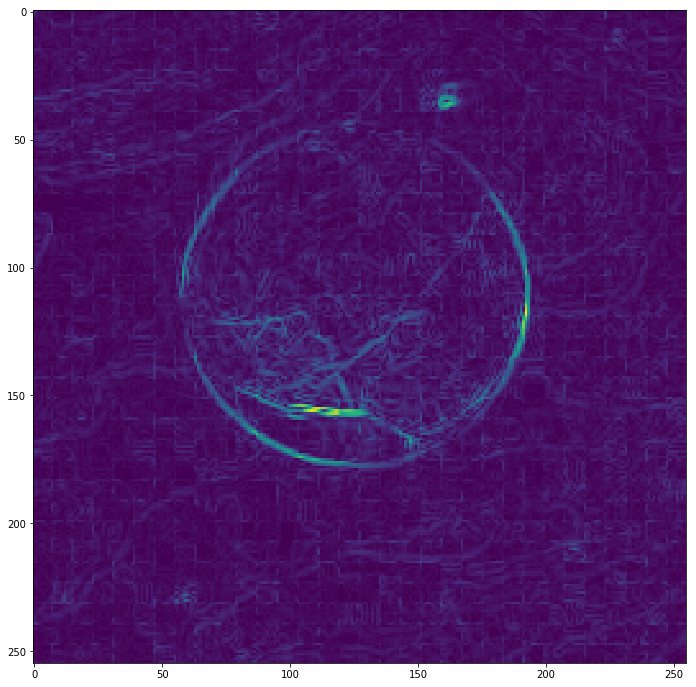

In [17]:
fig = figure(0, (12,12))
imshow(edges);

## Now, how can we remove some of the noise from our image?

- Any ideas?
- Are there properties of our noise that we can exploit to help us seperate it from our signal?

![](videos/noisy_image_rotating_1.gif)

## **Local Averages**

A very successful/popular appraoch to noise reduction is to replace the individual pixels in our images with some type of weighted average of their local neighborhoods.

![](graphics/averaging_slides/01.png)

# **How would this operation change the appearance of our image?**

![](graphics/spacer_small.png)

- Let's find out!
- Now, before we code this up, let's generalize this process a little.
- A more general way to think about the average of our neighborhood is as the dot product of our image patch with a (3x3) matrix.

In [18]:
#Little trick to progress through slides within the notebook
from IPython.display import Image, display
from ipywidgets import interact

#Quick method to let me step through "slides"
def slide_show(slide_num=1):     
    display(Image('graphics/averaging_slides/' + str(slide_num).zfill(2) + '.png'))

In [19]:
interact(slide_show, slide_num = (1, 2));

A Jupyter Widget

- It turns out that taking the dot product of our image patch with a small matrix or kernel like this is incredibly common in computer vision.
- Doing this across a whole image is called filtering, convolution, or cross correlation, we'll get into the details later.
- Let's write a method to filter an image with an arbitray kernel/filter
- First, let's think though how exactly our method will work.

![](graphics/question_three-01.png)

- Now, let's think about how to describe what we would like to do mathematically.
- But first, we need to define the coordinate system we'll use on our images.

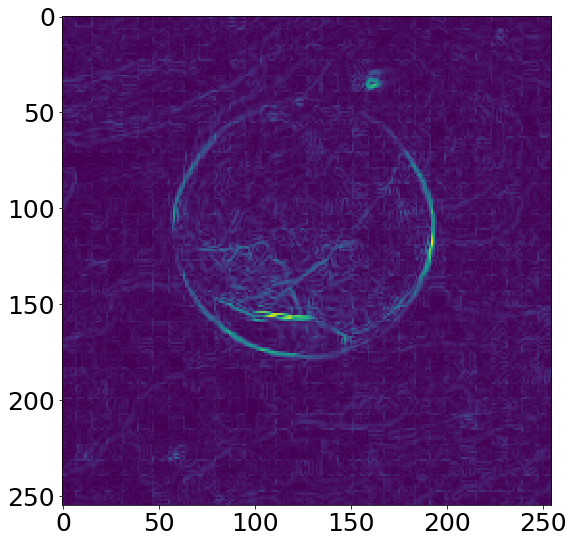

In [20]:
fig = figure(0, (9,9))
ax = fig.add_subplot(111)
ax.imshow(edges)
ax.tick_params(axis='both', which='major', labelsize=25)

- As you may already know, the coordinate system of images in matplotlib is defined with the origin in the upper left hand corner, positive is down and to ther right. Our first index corresponds to the vertical dimension and our second index corresponds to the horizontal.

![](graphics/question_four-01.png)

- For convenience (for now), let's define the the origin of Kernel coordinate systems to be in the center of our Kernel, and let our kernel be of size 2N+1 by 2M+1. This forces our kernel have odd dimensions (as opposed to even), but we can deal with that for now.

![](graphics/spacer_small.png)

![](graphics/spacer_small.png)

# An Equation!

# $$
S(i, j) = \sum_{m=-M}^M \sum_{n=-N}^N I(i+m, j+n)K(m, n)
$$

- Alright, now we're getting somewhere!
- This operation is know as [cross correlation](https://en.wikipedia.org/wiki/Cross-correlation) in 2 dimensions, and is very similar to [convolution](https://en.wikipedia.org/wiki/Convolution), something we'll discuss later. To compute convolution instead of cross correlation, we simply flip our kernel relavive to our images: $S(i, j) = \sum_{m=-M}^M \sum_{n=-N}^N I(i-m, j-n)K(m, n)$.
- Now, we're almost ready to code this up, but first we have one last adjustment to make. 
- Since both our kernel and images are going to be represented as numpy arrays, we need to index them each from the upper right corner:



![](graphics/question_five-01.png)

![](graphics/spacer_small.png)

___

$$
S(i, j) = \sum_{m=-M}^M \sum_{n=-N}^N I(i+m, j+n)K(m-M, n-N)
$$

- Ok, we finally have an equation!
- Ok, we're *finally* ready to do some filtering!
- We could implement our filter in exactly as written in the above equation, howewever this would require iterating throug $i, j$ as well, making for 4 for-loops. Also, the indexing of S is a little weird - we'll simplify things a little, and us np.multiply to multiply our image patch and kernel matrices together:

In [21]:
def filter_2d(im, kernel):
    '''
    Filter an image by taking the dot product of each 
    image neighborhood with the kernel matrix.
    Args:
    im = (H x W) grayscale floating point image
    kernel = (M x N) matrix, smaller than im
    Returns: 
    (H-M+1 x W-N+1) filtered image.
    '''

    M = kernel.shape[0] 
    N = kernel.shape[1]
    H = im.shape[0]
    W = im.shape[1]
    
    filtered_image = np.zeros((H-M+1, W-N+1), dtype = 'float64')
    
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            image_patch = im[i:i+M, j:j+N]
            filtered_image[i, j] = np.sum(np.multiply(image_patch, kernel))
            
    return filtered_image

![](graphics/averaging_slides/02.png)

- Now, remember that the whole point of all of this was to try to reduce the noise in our images by taking local averges. 
- Another name for this local average kernel is a box or [boxcar function](https://en.wikipedia.org/wiki/Boxcar_function).
- Let's try doing this with our new `filter_2d` method. 

In [22]:
kernel = (1/9)*np.ones((3,3))

In [23]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [24]:
# Filter Image!
im_filtered = filter_2d(gray, kernel)

In [25]:
im_filtered.shape

(254, 254)

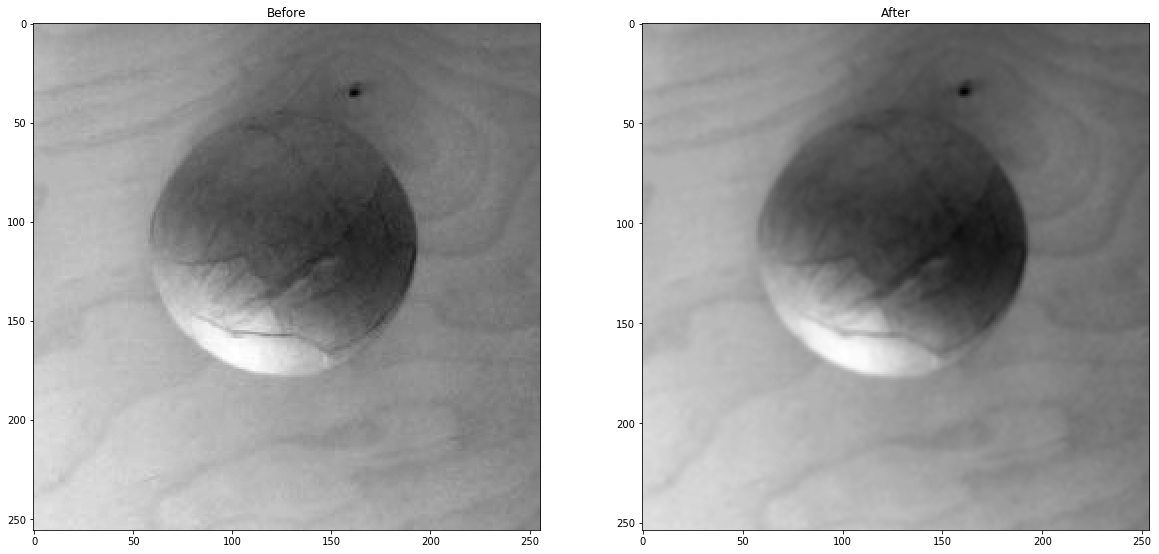

In [26]:
fig = figure(0, (20,10))

fig.add_subplot(1,2,1)
imshow(gray, cmap = 'gray');
title('Before');

fig.add_subplot(1,2,2)
imshow(im_filtered, cmap = 'gray');
title('After');

- It may be a little hard to see, but our filtered image is a little smoother!

# How could we smooth our image even further?

![](graphics/spacer_small.png)

- One way to achieve this is to use a larger kernel:

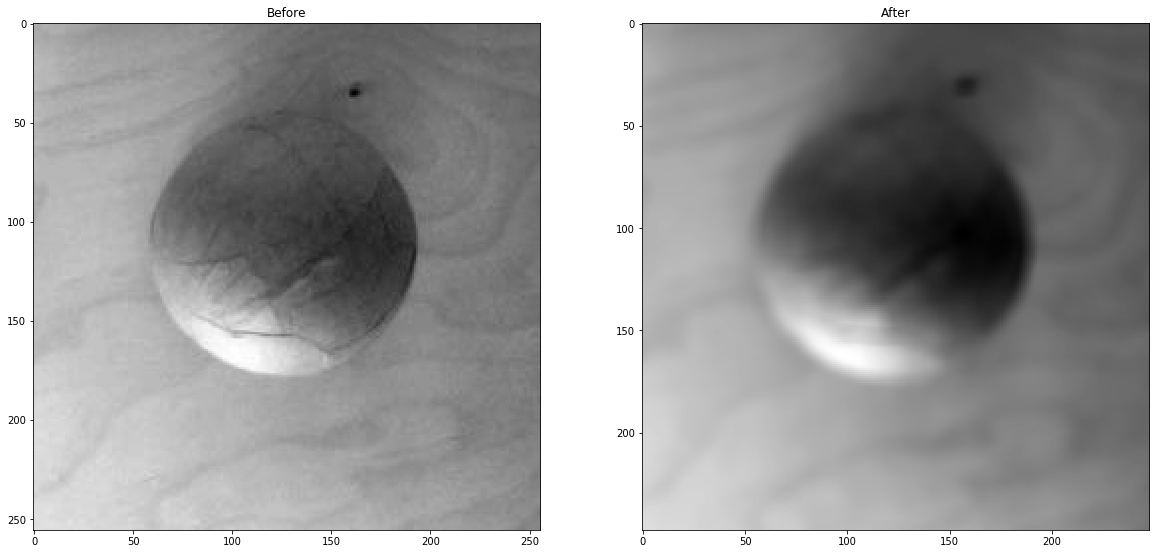

In [27]:
kernel = (1/81)*np.ones((9,9))
im_filtered = filter_2d(gray, kernel)

fig = figure(0, (20,10))

fig.add_subplot(1,2,1)
imshow(gray, cmap = 'gray');
title('Before');

fig.add_subplot(1,2,2)
imshow(im_filtered, cmap = 'gray');
title('After');

- Now we can really see some smoothing taking place!
- Let's have a look at our filtering operation on another image:

In [28]:
kernel = (1/25)*np.ones((9,9))

In [29]:
#Load up another image:
brick = imread('data/easy/brick/brick_4.jpg')

In [30]:
#Convert to grayscale and filter
brick_gray = convert_to_grayscale(brick)
brick_filtered = filter_2d(brick_gray, kernel)

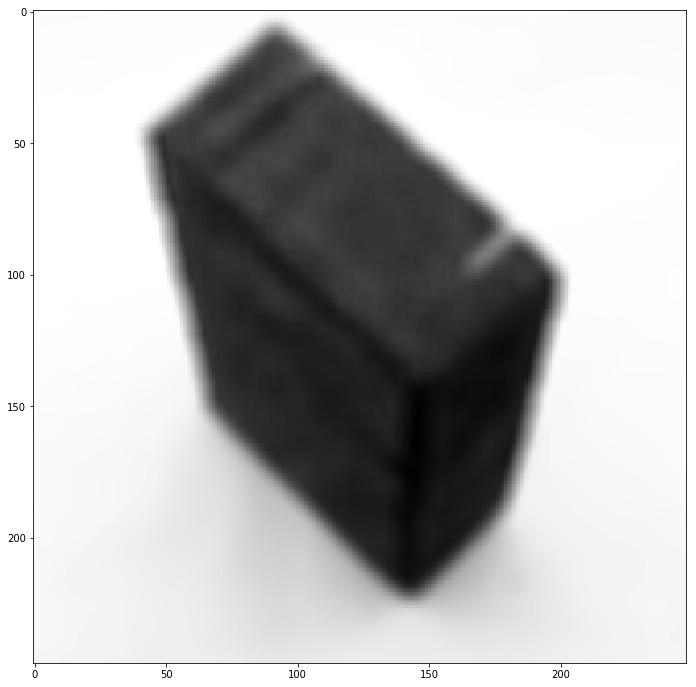

In [31]:
fig = figure(0, (12,12));
imshow(brick_filtered, cmap = 'gray');

- A blurry brick! 
- Now, do the edges of this brick look weird to you at all? 
- Anything strange going on?
- To me, it almost looks like there's some kind of "crosshash pattern" around our edges.
- Let's look at a **toy** example:

In [32]:
toy_image = np.zeros((21,21))
toy_image[10, 10] = 1.0

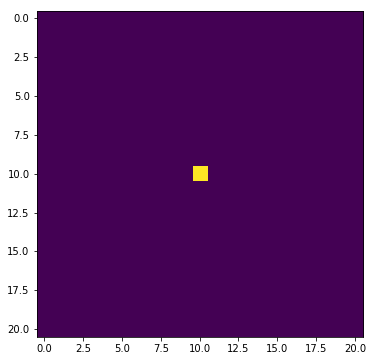

In [33]:
fig = figure(0, (6, 6))
imshow(toy_image);

- Our toy image is a small `(21x21)`, image of all zeros with a single value of 1 in the very center.
- A discrete 2d [Dirac Delta](https://en.wikipedia.org/wiki/Dirac_delta_function) function.
- Now, what will happen if we filter this function with our moving average?

![](graphics/question_six-01.png)

![](graphics/spacer_small.png)

- As you may have correctly guessed, the correct answer is **a**. 

*Quick Explanation*
- One way to think about this is imagining our kernel sliding over our image
- When our kernel is in, let's say, the upper left corner, all image values are zero - resulting in a filtered value of zero. 
- Now, whevever our kernel *eventually* reaches our central pixel, whenever our kernel overlaps this pixel at all, the resulting output value will be $\frac{1}{25} \cdot 1 = 0.04$.
- It doesn't matter if our kernel is directly above our central pixel or if the central pixels just "clips" the lower corner of our kerenl - if the central pixel is anywhere in the kernel, our output value will be a constant $0.04$
- This is why the central patch of our correct answer **a** is **uniform**.
- Finally, the answer is not **b**. **b** *is* uniform, but it's the central patch is not quite large enough - it's about `3x3` - it should be the same size as our filter.

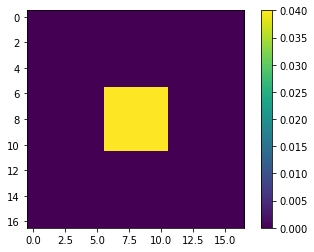

In [34]:
#And finally, just in case you're suspicious, we can actually perform the filtering in question:
box_5 = (1/25)*np.ones((5,5))
filtered_box_5 = filter_2d(toy_image, box_5)
imshow(filtered_box_5)
colorbar()

- Boom!
- Now, the reason for this fun little exercise:

## **This may not be a very "natural" way to blur our images.**

[Placeholder] Video of bluring image of brick with camera and/or bluring a printed out delta function.

## **How then, should we blur our images?**

- For our blur to look more natural, or behave as a de-focused camera lens, it would make sense for your blur to smoothly fade out from the cental bright pixel - more like option **d** in the question above.
- We can accomplish this by taking a **weighted average** around the central pixel in our kernel instead of a uniform average as we have thus far.
- A very popular way to do this in image processing is to use **guassian kernels**:

![](videos/rotating_guassians.gif)

- **Guassian kernels** have lots of nice properties, but the main one we care about there is that they decrease monotonically and smoothly from their central point.
- Checkout section 5.7 of Computer Vision by Shapiro + Stockman for some more nice properties.
- For now, let's figure out how to implement these guys in python.
- Here's the equation for a [2 dimensional symmetric guassian kernel](https://en.wikipedia.org/wiki/Gaussian_blur):

## $$
G_{\sigma}(x, y) = \frac{1}{2 \pi \sigma^2} exp \bigg(- \frac{(x^2+y^2)}{2 \sigma^2} \bigg)
$$

- Let's think through this function a bit.
- What do $x$, $y$, and $\sigma$ represent?
- What values of $x$ and $y$ maximize sigma?
- And most importantly, **how do we make this continuous function definition into a kernel we can actually use?**

![](graphics/spacer_small.png)

![](graphics/question_seven-01.png)

![](graphics/spacer_small.png)

*Explanation*
- One way I like to think through problems like this is it to pick some test numbers to help me think through the problem. 
- Let's pick the size of our kernel to be `(5x5)`, this would make `k=2`. 
- We know that our gaussian kernel should reach a maximum value at the center of our kernel `(i=2, j=2)`.
- Our Gaussian Kernel Function $G_{\sigma}(x, y)$ reaches a maximum when `x=0` and `y=0`.
    - One way to think about this is that any non-zero value of $x$ or $y$, when squared will become a positive number, and will make the overall argument of our exponent negative. $e$ to a negative power will always be smaller than $e^{0}$, so $G_{\sigma}(x, y)$ reaches a maximum when `x=0` and `y=0`.
- So the correct answer above should give an argmument of zero inside our exponent at the center of our kernel, when `(i=2, j=2)`.  
- The only answer that meets the criteria is **d**.

Alright, let's code it up!

In [35]:
def make_gaussian_kernel(size, sigma):
    '''
    Create a gaussian kernel of size x size. 
    Args: 
    size = must be an odd positive number
    sigma = standard deviation of gaussian in pixels
    Returns: A floating point (size x size) guassian kernel 
    ''' 
    #Make kernel of zeros:
    kernel = np.zeros((size, size))
    
    #Helpful for indexing:
    k = int((size-1)/2)
    
    for i in range(size):
        for j in range(size):
            kernel[i, j] = (1/(2*np.pi*sigma**2))*exp(-((i-k)**2 + (j-k)**2)/(2*sigma**2))
            
    return kernel

In [63]:
gaussian_kernel = make_gaussian_kernel(size = 11, sigma = 2)

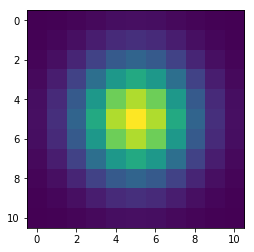

In [64]:
imshow(gaussian_kernel)

And in 3d:

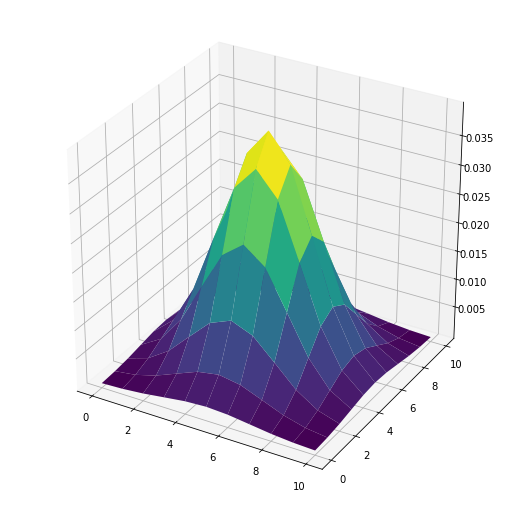

In [66]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(range(11), range(11))
# Plot kernel as 3d surface.
fig = plt.figure(0, (9,9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, gaussian_kernel, cmap=cm.viridis, antialiased=True)

## Alright, let's put it all together.

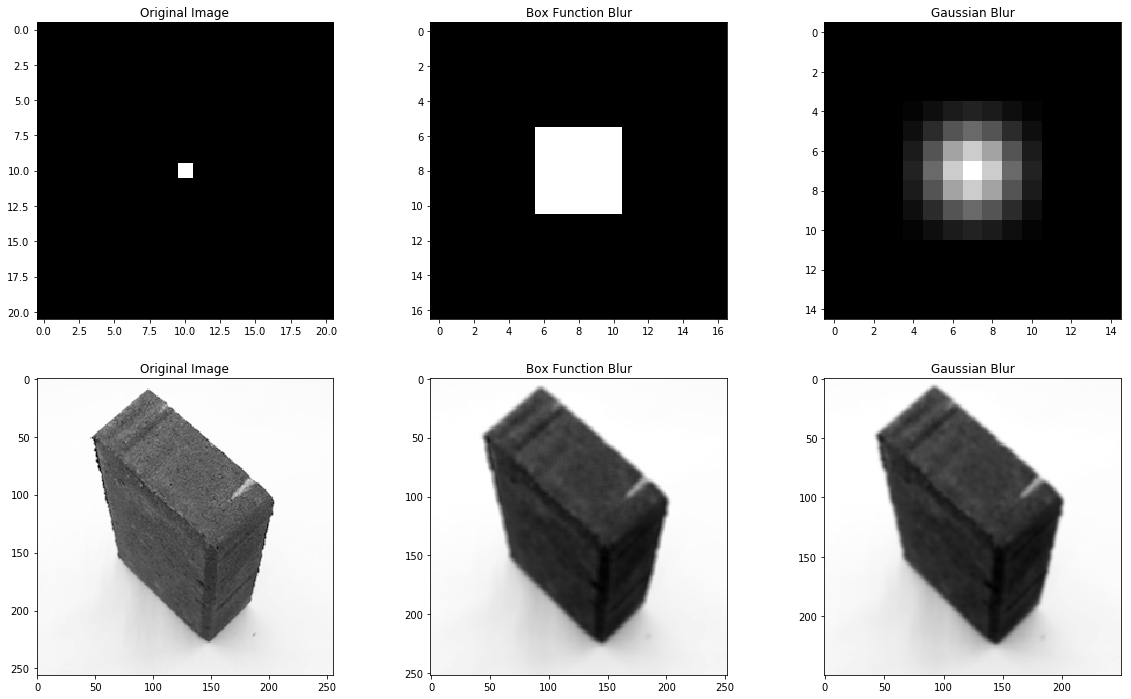

In [80]:
box_kernel = (1/25)*np.ones((5,5))
gaussian_kernel = make_gaussian_kernel(size = 7, sigma = 1.5)

fig = figure(0, (20, 12))

fig.add_subplot(2,3,1)
imshow(toy_image, cmap = 'gray')
title('Original Image');

fig.add_subplot(2,3,2)
imshow(filter_2d(toy_image, box_kernel), cmap = 'gray')
title('Box Function Blur');

fig.add_subplot(2,3,3)
imshow(filter_2d(toy_image, gaussian_kernel), cmap = 'gray')
title('Gaussian Blur');

fig.add_subplot(2,3,4)
imshow(brick_gray, cmap = 'gray')
title('Original Image');

fig.add_subplot(2,3,5)
imshow(filter_2d(brick_gray, box_kernel), cmap = 'gray')
title('Box Function Blur');

fig.add_subplot(2,3,6)
imshow(filter_2d(brick_gray, gaussian_kernel), cmap = 'gray')
title('Gaussian Blur');